## Imports

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.decomposition import PCA
from tqdm import tqdm
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

from IPython.display import display

sns.set_style('whitegrid')

## Load Data

In [2]:
data =  pd.read_csv('../processed_data/train_norm_rf_impute_cv_xrb_pulsar' , index_col = 'obs_id')
data = data.sample(frac=1).iloc[:,1:]
data.head()

,class,src_n,src_id,significance,flux_aper_hilim_s,flux_aper_hilim_u,flux_aper_hilim_m,flux_aper_hilim_h,flux_aper_hilim_b,flux_aper_lolim_s,...,bb_ampl_lolim,bb_ampl_hilim,bb_stat,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
obs_id,,,,,,,,,,,,,,,,,,,,,
PULSAR_OBS_4,PULSAR,PSR J0100-7211,PL0003,65.51,0.558984,0.357157,0.754482,0.882534,0.860621,0.608770,...,0.002361,0.001662,0.032960,0.170679,0.005670,0.128146,0.109404,0.103484,0.115342,0.073378
NS_OBS_196,XRB,XMMU J004245.2+41172,NS0044,49.26,0.716887,0.472891,0.672174,0.689680,0.698490,0.748931,...,0.001504,0.001324,0.101978,0.118533,0.004105,0.071326,0.000451,0.003623,0.097914,0.084040
PULSAR_OBS_6,PULSAR,PSR J0100-7211,PL0003,65.51,0.283839,0.219570,0.405927,0.355495,0.370972,0.259532,...,0.000000,0.000000,0.073213,0.149260,0.008123,0.083441,0.085975,0.086753,0.097313,0.074295
CV_OBS_413,CV,CXOGLB J002403.1-72044,CV0072,6.22,0.709259,0.494417,0.676906,0.700728,0.705402,0.741291,...,0.001129,0.000846,0.041074,0.105522,0.004629,0.069228,0.006513,0.009613,0.003330,0.000000
CV_OBS_646,CV,CXOGLB J002411.8-72044,CV0092,5.00,0.392904,0.505315,0.358703,0.474512,0.453048,0.568971,...,0.000000,0.000000,0.073213,0.139251,0.006583,0.083441,0.059645,0.060865,0.075076,0.074295


In [3]:
info_col = [ 'class' , 'src_n' , 'src_id' , 'significance']
data_info = data[info_col]
data_val = data.drop(columns=info_col) 
data_label = data['class']

In [4]:
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier()

# Hyper Parameter Tuning

In [5]:
rfc_v2 = RandomForestClassifier()

## Random Search

In [6]:
from sklearn.model_selection import RandomizedSearchCV

In [7]:
n_estimators = [int(x) for x in np.linspace(80 , 450 , num=40)]
max_features = ['log2' , 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 150, num = 40)]
min_samples_split = [int(x) for x in np.linspace(2,20 ,num = 30)]
min_samples_leaf = [int(x) for x in np.linspace(2,30 , num = 30)]
bootstrap = [True , False]

In [8]:
params_dict = {
    'n_estimators' : n_estimators , 
    'max_features' : max_features ,
    'max_depth' :max_depth , 
    'min_samples_split' : min_samples_split , 
    'min_samples_leaf' : min_samples_leaf, 
    'bootstrap' : bootstrap 
}

In [10]:
rs = RandomizedSearchCV(
    rfc_v2 , 
    params_dict , 
    n_iter = 200,
    cv = 5 ,
    verbose = 5 ,
    n_jobs=-1 , 
    random_state= 0 
)

In [11]:
rs.fit(data_val , data_label)
rs.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


{'n_estimators': 222,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 85,
 'bootstrap': False}

In [12]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,split3_test_score,split4_test_score,mean_test_score,rank_test_score
0,222,2,2,sqrt,85,False,0.958974,0.933333,0.951795,1
1,136,2,2,sqrt,27,False,0.958974,0.928205,0.951795,1
2,402,7,2,sqrt,146,False,0.948718,0.938462,0.951795,1
3,288,4,2,log2,150,False,0.953846,0.928205,0.951795,1
4,184,12,2,sqrt,127,False,0.933333,0.933333,0.948718,5
5,307,17,2,sqrt,130,False,0.928205,0.933333,0.947692,6
6,307,5,4,sqrt,77,False,0.938462,0.933333,0.946667,7
7,193,11,7,sqrt,20,False,0.928205,0.933333,0.945641,8
8,89,18,6,sqrt,69,False,0.923077,0.928205,0.945641,8
9,146,10,6,sqrt,46,False,0.923077,0.933333,0.945641,8


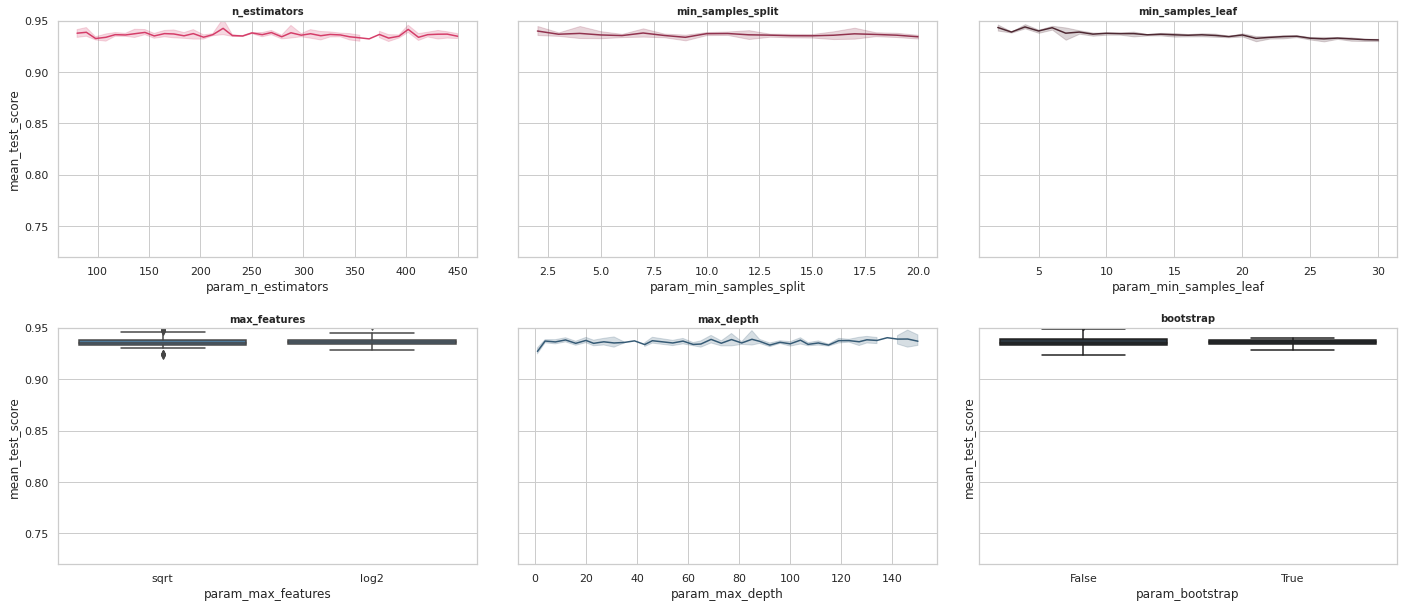

In [13]:
sns.set(style="whitegrid", color_codes=True, font_scale = 1)
fig, axs = plt.subplots(ncols=3, nrows=2  , sharey=True)
fig.set_size_inches(24,10)
colors = sns.diverging_palette(240, 0, n=6 , center='dark')
sns.lineplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0],color=colors[5]) 
axs[0,0].set_ylim([.72,.95])
axs[0,0].set_title(label = 'n_estimators', size=10, weight='bold')
sns.lineplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1],color=colors[4])
#axs[0,1].set_ylim([.85,.93])
axs[0,1].set_title(label = 'min_samples_split', size=10, weight='bold')
sns.lineplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2],color=colors[3])
#axs[0,2].set_ylim([.80,.93])
axs[0,2].set_title(label = 'min_samples_leaf', size=10, weight='bold')
sns.boxplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0],color=colors[0])
#axs[1,0].set_ylim([.88,.92])
axs[1,0].set_title(label = 'max_features', size=10, weight='bold')
sns.lineplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1],color=colors[1])
#axs[1,1].set_ylim([.80,.93])
axs[1,1].set_title(label = 'max_depth', size=10, weight='bold')
sns.boxplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2] , color=colors[2])
#axs[1,2].set_ylim([.88,.92])
axs[1,2].set_title(label = 'bootstrap', size=10, weight='bold')
fig.subplots_adjust(wspace=0.1 , hspace=0.3)

plt.show()


### Result
> Best Model Parameters
```

{'n_estimators': 288,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 150,
 'bootstrap': False}
```
> Best Parameter values

```
{'n_estimators': [136 , 309 , 347,385],
 'min_samples_split': [7,12,44],
 'min_samples_leaf': [2,7,12],
 'max_features': 'sqrt',
 'max_depth': [43 ,85, 100],
 'bootstrap': False}
```

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
n_estimators = [140 , 170 , 230]
max_features = ['sqrt'] 
bootstrap = [False]
max_depth =  [56 ,85, 100]
min_samples_leaf = [2,12]
min_samples_split = [7,18,28]

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [ ]:
gs = GridSearchCV(rfc_v2 , param_grid , cv=5 , verbose=5 , n_jobs=-1)
gs.fit(data_val , data_label)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [56, 85, 100],
                         'max_features': ['sqrt'], 'min_samples_leaf': [2, 12],
                         'min_samples_split': [7, 18, 28],
                         'n_estimators': [140, 170, 230]},
             verbose=5)

In [ ]:
gs.best_params_

{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 18,
 'n_estimators': 140}

# Best Random Forest

So Now we have identified best random Forest , lets see how its various performance are.

## Load Data

In [24]:
data_all =  pd.read_csv('../processed_data/train_none_rf_impute_cv_xrb_pulsar' , index_col = 'obs_id').iloc[: , 1:]
display(data_all)


,class,src_n,src_id,significance,flux_aper_hilim_s,flux_aper_hilim_u,flux_aper_hilim_m,flux_aper_hilim_h,flux_aper_hilim_b,flux_aper_lolim_s,...,bb_ampl_lolim,bb_ampl_hilim,bb_stat,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
obs_id,,,,,,,,,,,,,,,,,,,,,
BH_OBS_146,XRB,J1745-2900,BH0027,337.00,-14.265440,-14.874194,-14.061230,-13.473919,-13.346691,-14.363813,...,0.000012,0.000015,1.193,8.101,13.690,5.470,1.775000e+01,23.1800,13.05,0.707
PULSAR_OBS_33,PULSAR,PSR J0358+5413,PL0009,19.44,-15.723998,-12.577082,-14.000000,-14.441892,-14.605373,-14.000000,...,0.000000,0.000000,2.000,14.000,30.000,8.000,1.110000e+02,127.0000,126.00,1.000
PULSAR_OBS_222,PULSAR,PSR J1745-2900,PL0081,107.91,-13.542421,-13.538501,-13.717604,-13.228707,-12.990974,-13.587204,...,0.000246,0.000312,3.711,4.327,4.877,3.874,3.984000e-07,0.6487,129.00,0.993
NS_OBS_321,XRB,XTE J1709-267,NS0049,212.84,-13.656986,-13.299642,-13.382266,-13.067121,-12.888066,-13.985060,...,0.000000,0.000000,2.000,16.000,35.000,9.000,1.600000e+02,185.0000,165.00,1.000
PULSAR_OBS_346,PULSAR,PSR J1833-103,PL0099,121.78,-14.932185,-14.935917,-15.318036,-14.742802,-14.522156,-16.046240,...,0.000000,0.000000,2.000,19.000,39.000,11.000,1.660000e+02,192.0000,167.00,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CV_OBS_325,CV,1WGA J1740.6-5340,CV0051,64.73,-15.851706,-14.729554,-14.000000,-13.339419,-13.347947,-14.000000,...,0.000000,0.000000,2.000,14.000,30.000,8.000,1.110000e+02,128.0000,125.00,1.000
NS_OBS_370,XRB,SAXWFC J1744.9-2921.,NS0068,9.04,-15.420102,-14.154716,-15.320663,-13.804377,-13.800794,-14.000000,...,0.000000,0.000000,2.000,14.000,30.000,8.000,1.110000e+02,128.0000,125.00,1.000
PULSAR_OBS_160,PULSAR,PSR J1400-6325,PL0049,56.35,-13.688034,-12.985900,-12.396639,-11.233513,-11.211337,-13.891435,...,0.000388,0.000497,1.135,8.727,11.000,7.208,2.263000e+02,238.9000,214.10,1.038


In [25]:
np.random.seed(433)
data = data_all.sample(frac=1)
data_label = data['class']
x = data.copy()
brems_model = ['brems_nh' , 'brems_nh_lolim' , 'brems_nh_hilim' , 'brems_kt' , 'brems_kt_lolim' , 'brems_kt_hilim']
inter_obs_param = ['var_inter_index' , 'var_inter_prob' , 'var_inter_sigma' , 'bb_kt_hilim']
x = x.drop(columns = brems_model + inter_obs_param +['bb_stat'])
y = data_label.copy()
x

,class,src_n,src_id,significance,flux_aper_hilim_s,flux_aper_hilim_u,flux_aper_hilim_m,flux_aper_hilim_h,flux_aper_hilim_b,flux_aper_lolim_s,...,powlaw_stat,bb_kt,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim,bb_nh,bb_ampl,bb_ampl_lolim,bb_ampl_hilim,brems_stat
obs_id,,,,,,,,,,,,,,,,,,,,,
CV_OBS_208,CV,[HPH2013] 176,CV0018,11.31,-15.315424,-13.000000,-14.854182,-13.689094,-13.675718,-16.249955,...,1.000,0.0000,0.0000,74.00,138.000,61.00,0.000000,0.000000,0.000000,1.000
CV_OBS_719,CV,XMMSL2 J004231.9+41162,CV0110,174.76,-15.214884,-14.551448,-14.229516,-13.341798,-13.301030,-15.983803,...,0.414,1.1310,0.9934,48.07,5.328,24.38,0.000003,0.000002,0.000005,0.420
PULSAR_OBS_265,PULSAR,PSR J1745-2900,PL0081,107.91,-14.041627,-13.000000,-14.549905,-13.000000,-13.967784,-14.467628,...,1.000,0.0000,0.0000,113.00,165.000,92.00,0.000000,0.000000,0.000000,1.000
PULSAR_OBS_327,PULSAR,PSR J1833-103,PL0099,121.78,-14.668370,-13.000000,-14.899285,-14.270997,-14.673664,-16.199902,...,1.000,0.0000,0.0000,73.00,138.000,60.00,0.000000,0.000000,0.000000,1.000
CV_OBS_308,CV,[HPH2013] 81,CV0039,7.81,-13.266161,-14.042010,-13.511167,-14.485585,-13.064191,-13.336488,...,1.769,0.2024,0.1890,27.28,12.070,19.16,0.010700,0.006284,0.019120,1.560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BH_OBS_28,XRB,SAX J1819.3-2525,BH0009,26.51,-14.062332,-13.000000,-14.197911,-13.846185,-13.590236,-14.232399,...,1.000,0.0000,0.0000,73.00,138.000,60.00,0.000000,0.000000,0.000000,1.000
CV_OBS_720,CV,XMMSL2 J004231.9+41162,CV0110,174.76,-12.229148,-13.448306,-11.926282,-13.000000,-11.307153,-12.238072,...,1.795,0.6147,0.6105,10.59,9.750,10.17,0.002500,0.002436,0.002565,2.158
PULSAR_OBS_326,PULSAR,PSR J1833-103,PL0099,121.78,-14.504178,-15.563678,-13.660946,-12.740167,-12.696156,-14.658170,...,0.717,1.0130,0.9558,51.51,36.620,43.61,0.000018,0.000014,0.000022,0.734


## Train and save model

{'n_estimators': 222,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 85,
 'bootstrap': False}

In [26]:
# Find and fit besst model
train_acc = []
test_acc = []
best_clf = ''
score = 0 
for i in tqdm(range(10)):
    rs = int(np.random.uniform(10 , 99999))
    '''
    27601 0.958974358974359
    79324
    '''
    #rs = 60328 #with brems
    #rs =  87023 #without brems works whether bb_stat included or not
    rs = 45532 
    np.random.seed(rs)

    df =  x.sample(frac=1 , random_state=rs)
    y = df['class']
    x_train , x_test , _ , _ = train_test_split(df , y , test_size=0.2 , shuffle=True, random_state=10 , stratify=y)
    info_col = ['src_n' , 'src_id' , 'significance' , 'class']
    id_train = x_train[info_col]
    id_test = x_test[info_col]
    y_train = x_train['class']
    y_test = x_test['class']
    x_train = x_train.drop(info_col , axis=1)
    x_test = x_test.drop(info_col , axis = 1 )
    #np.random.seed(5926)
    clf = RandomForestClassifier(
        n_estimators= 222 , 
        criterion='entropy' ,
        random_state=12,
        max_depth=85 , 
        min_samples_leaf= 2 , 
        min_samples_split=2 , 
        bootstrap=False ,
        max_features='sqrt' ,
        class_weight='balanced'
        )
    clf.fit(x_train , y_train)
    tr = clf.score(x_train , y_train)
    next_score = clf.score(x_test , y_test)
    if(next_score > score):
        best_clf = clf
        score = next_score
        print('better found' , rs , next_score)
    #print(next_score , score)
    #print('\n -----------------')
    #print(rs , tst)
    ##train_acc.append(tr)
    #test_acc.append(tst)

 10%|█         | 1/10 [00:05<00:50,  5.63s/it]

better found 45532 0.375


 20%|██        | 2/10 [00:15<01:02,  7.82s/it]


KeyboardInterrupt: 

In [9]:
test_score =  best_clf.score(x_test , y_test)
print(test_score)

0.65


### Entropy-Wise Feature Importance

In [13]:
feat_imp = clf.feature_importances_
feat_names = x_train.columns.to_list()
feat = pd.DataFrame()
feat.insert( 0 , 'feat_name' , feat_names)
feat.insert(1 , 'feat_imp' , feat_imp)
feat = feat.sort_values(by = 'feat_imp' , ascending=False).reset_index(drop=True)
feat_names_sorted = feat['feat_name']
display(feat)
#feat.to_csv('result/feat_imp.csv')

,feat_name,feat_imp
0,powlaw_nh,0.111398
1,bb_nh_lolim,0.107420
2,powlaw_nh_hilim,0.099488
3,bb_nh,0.095706
4,powlaw_nh_lolim,0.073798
...,...,...
76,photflux_aper_lolim_u,0.002804
77,flux_brems_lolim,0.002683
78,brems_stat,0.002626
79,flux_aper_u,0.002546


## Bake Result

### Function

In [24]:
def create_res_data(x , y , id_data  , cl_type):
    pred = clf.predict(x)
    pred_prob = np.asarray(clf.predict_proba(x))
    pred_prob_xrb = pred_prob[:,0]
    pred_prob_cv = pred_prob[:,1]
    pred_prob_pulsar = pred_prob[:,2]
    pred_prob = [np.amax(pi) for pi in pred_prob]
    res =  x.copy()
    res = res[feat_names_sorted]
    #id_data = id_data.reset_index(drop=True)
    res.insert(0 , 'clf_type' , [cl_type]*len(res))
    res.insert(1 , 'true_class' , y)
    res.insert(2 ,'pred_class' , pred)
    res.insert(3 , 'pred_prob' , pred_prob)
    res.insert(4 , 'XRB_prob' , pred_prob_xrb)
    res.insert(5 , 'CV_prob' , pred_prob_cv)
    res.insert(5 , 'PULSAR_prob' , pred_prob_pulsar)
    res = pd.concat([id_data , res] , axis=1).drop('class' , axis=1)
    truth = []
    th_class = [] 
    is_ok = [] 
    for tc , pc , pp in zip(res['true_class'] , res['pred_class'] , res['pred_prob']):
        if(tc==pc): is_ok.append(1)
        else: is_ok.append(0)
        if(pp > 0.80):
            th_class.append(pc)
            if(tc==pc):
                truth.append(1)
            else: truth.append(0)
        else :
            truth.append(2)
            th_class.append('X')
    res.insert(5 , 'th_class' , th_class )
    res.insert(6 , 'truth' , truth)
    res.insert(6 , 'is_ok' , is_ok)
    return res


### Bake it

In [34]:

train_res = create_res_data(x_train , y_train ,id_train , cl_type='train')
test_res = create_res_data(x_test , y_test ,id_test , cl_type='test')
#train_res.to_csv('result/train_res_rf.csv')
#test_res.to_csv('result/test_res_rf.csv')
res_data = pd.concat([train_res , test_res])
#res_data =  res_data.set_index('obs_id')
#res_data.to_csv('../result/res_rf_tuned_rf_impute.csv')

# Result Analysis

In [36]:
cv_data = res_data[res_data['true_class']=='CV']
cv_sources = np.unique(cv_data['src_id'])
print('Num of CV sources :' , len(cv_sources))
print('Num of CV obs :' , len(cv_data))

cv_data = res_data[res_data['true_class']=='XRB']
cv_sources = np.unique(cv_data['src_id'])
print('Num of LMXRB sources :' , len(cv_sources))
print('Num of LMXRB obs :' , len(cv_data))

cv_data = res_data[res_data['true_class']=='PULSAR']
cv_sources = np.unique(cv_data['src_id'])
print('Num of PULSAR sources :' , len(cv_sources))
print('Num of PULSAR obs :' , len(cv_data))

Num of CV sources : 65
Num of CV obs : 515
Num of LMXRB sources : 75
Num of LMXRB obs : 460
Num of PULSAR sources : 20
Num of PULSAR obs : 628


In [37]:
data =  res_data.copy()
total = len(data)
print('Total samples' , total)
am_clf = len(data[data['th_class']=='X'])
print('Ambiguous calssification : ' , am_clf)
wrong_clf = len(data[data['truth']==0])
print('Wrong calssification : ' , wrong_clf)

acc = (total-am_clf-wrong_clf)/total
print('Classification accuracy :{:.3f}'.format(acc))

Total samples 1603
Ambiguous calssification :  102
Wrong calssification :  4
Classification accuracy :0.934


## ROC Curve

In [38]:
from sklearn.metrics import roc_curve , det_curve , roc_auc_score

In [41]:
fpr , fnr , threshold = det_curve(res_data['true_class'] , res_data['XRB_prob'] , pos_label='XRB')
plt.plot(threshold , fpr)
fpr , fnr , threshold = det_curve(res_data['true_class'] , res_data['CV_prob'] , pos_label='CV')
plt.plot(threshold , fpr)
fpr , fnr , threshold = det_curve(res_data['true_class'] , res_data['PULSAR_prob'] , pos_label='PULSAR')
plt.plot(threshold , fpr)
plt.show()

ValueError: Only one class present in y_true. Detection error tradeoff curve is not defined in that case.

In [44]:
roc_auc = roc_auc_score(res_data['true_class'] , res_data['CV_prob'])
roc_auc

ValueError: multi_class must be in ('ovo', 'ovr')

## Feature Importance

multiplying the average standardised mean value of each feature split on each class, with the corresponding model._feature_importances array element. You can write a simple function that standardises your dataset, computes the mean of each feature split across class predictions, and does element-wise multiplication with the model._feature_importances array. The greater the absolute resulting values are, the more important the features will be to their predicted class, and better yet, the sign will tell you if it is small or large values that are important.

https://stackoverflow.com/questions/35249760/using-scikit-to-determine-contributions-of-each-feature-to-a-specific-class-pred/35255612

In [45]:
from sklearn.preprocessing import scale
import json
def class_feature_importance(X, Y, feature_importances):
    N, M = X.shape
    X = scale(X)

    out = {}
    for c in set(Y):
        print(c)
        out[c] = dict(
            zip(range(M), np.mean(X[Y==c, :], axis=0)*feature_importances)
        )
    return out


In [46]:
feat_imp = best_clf.feature_importances_ 
result = class_feature_importance(x_train , y_train , feat_imp)
#print(json.dumps(result,indent=4))

CV
XRB
PULSAR


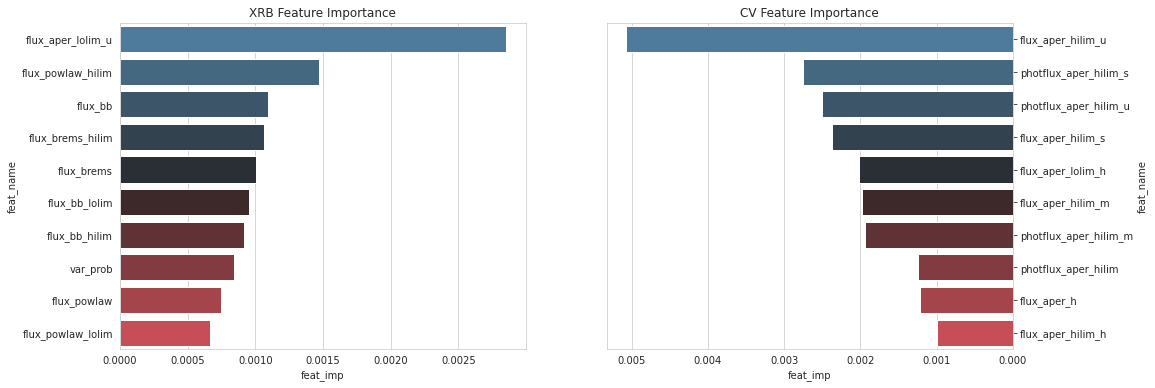

In [47]:
sns.set_style('whitegrid')
fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize=(16,6))
feat_names = x_train.columns.to_list()
top_feat = 10
#result['BH'].keys() = feat_names
values = list(result['XRB'].values())
df=  pd.DataFrame()
df.insert(0 , 'feat_name' , feat_names)
df.insert(1 , 'feat_imp' , values)
df = df.sort_values(by='feat_imp' , ascending=False)
df_feat_cla = df.copy() # cla - class A
palette = sns.diverging_palette(240, 10, n=top_feat , center='dark')
ax1 = sns.barplot(data = df.iloc[:top_feat,:] ,y = 'feat_name' , x = 'feat_imp'  ,palette = palette, ax=ax[0] )

values = list(result['CV'].values())
df=  pd.DataFrame()
df.insert(0 , 'feat_name' , feat_names)
df.insert(1 , 'feat_imp' , values)
df = df.sort_values(by='feat_imp' , ascending=False)
df_feat_clb = df.copy() # clb - class B
palette = sns.diverging_palette(240, 10, n=top_feat , center='dark')
ax2 = sns.barplot(data = df.iloc[:top_feat,:] ,y = 'feat_name' , x = 'feat_imp'  ,palette = palette, ax=ax[1] )
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.invert_xaxis()
ax1.set_title('XRB Feature Importance')
ax2.set_title('CV Feature Importance')
plt.show()

In [48]:
def is_outlier(points, thresh):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = np.asarray(points)
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)
    modified_z_score = 0.6745 * diff / med_abs_deviation    
    return modified_z_score > thresh

/home/kumaran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/home/kumaran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/home/kumaran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: Attempting to set identical left == right == -13.0 results in singular transformations; automatically expanding.
/home/kumaran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/home/kumaran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/home/kumaran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: Attempting to set identical left == right == -12.0 results in singular transformations; automatically expanding.
/home/kumaran/.local/lib/python3.6/site-packages/ipykernel_launcher.

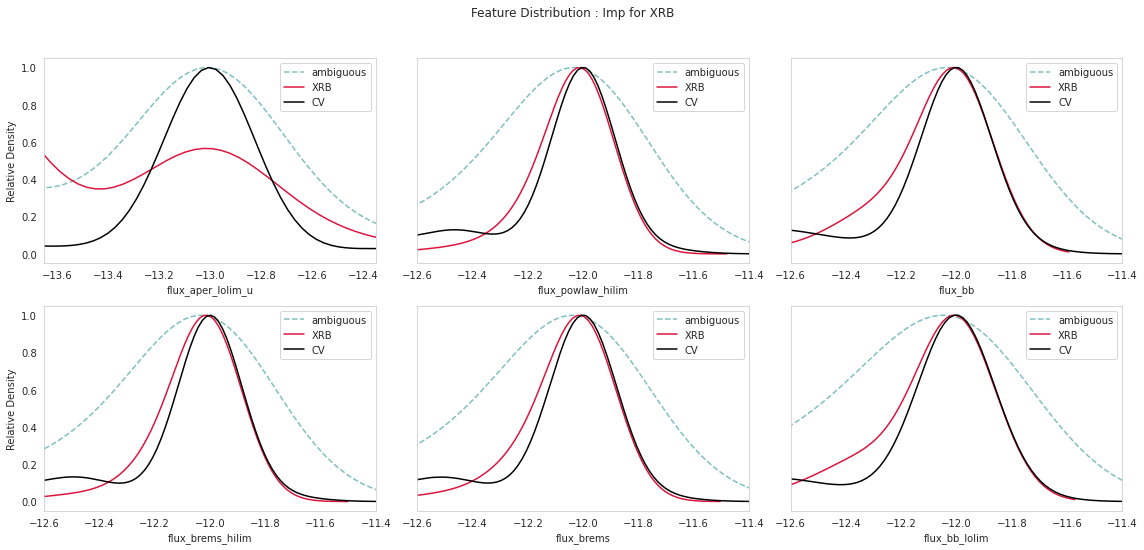

In [49]:
fig, axs = plt.subplots(2,3, sharey=True, sharex=False , figsize=(16 , 8))
col = sns.diverging_palette(240, 10, n=6 , center='dark')
f_name  =  df_feat_cla['feat_name'][:6]
axs = np.ndarray.flatten(axs)
sns.set_style('white')
i = 0 
for f , axi in zip(f_name , axs):
    if(f=='bb_nh_lolim'):
        filtered_res = res_data[~is_outlier(res_data[f] , thresh=150)]
    elif(f=='bb_nh'):
        filtered_res = res_data[~is_outlier(res_data[f] , thresh=100)]
    else:
        filtered_res = res_data[~is_outlier(res_data[f] , thresh=20)]
    #filtered_res = res_data.copy()
    #print(f)
    ax = sns.displot(data = res_data , x = f ,hue = 'true_class' , kind='kde' ,)
    plt.close()
    ax2 = sns.displot(data = res_data[res_data['th_class']=='X'] , x = f ,hue = 'th_class' , kind='kde' ,)
    plt.close()
    amb  , amb_x= ax2.ax.lines[0].get_ydata() , ax2.ax.lines[0].get_xdata()
    amb =  amb / np.amax(amb)
    bh  ,  bh_x = ax.ax.lines[0].get_ydata() , ax.ax.lines[0].get_xdata() 
    bh = bh /np.amax(bh) 
    ns , ns_x = ax.ax.lines[1].get_ydata() , ax.ax.lines[1].get_xdata()
    ns = ns/np.amax(ns)
    #x_val = ax.ax.lines[0].get_xdata() , ax.ax.lines[1].get_xdata()
    #plt.close()
    axi.plot(amb_x , amb , label = 'ambiguous' , color='teal' , alpha=0.5 , linestyle='--')
    axi.plot(ns_x , ns , label = 'XRB' , color='crimson')
    axi.plot(bh_x , bh , label = 'CV' , color = 'black')
    axi.legend()
    axi.set_xlim(np.amin(filtered_res[f]) , np.amax(filtered_res[f]))
    axi.grid(True , color='k' , linestyle=':' , alpha=0.4)
    axi.grid(False)
    axi.set_xlabel(f)
    #axi.set_xscale('log')
    if(not(i%3)):
        axi.set_ylabel('Relative Density')
    i+=1    
    #axi.text(0.1 , 0.1 ,  'Feature : '+f)
fig.suptitle('Feature Distribution : Imp for XRB')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
plt.close()


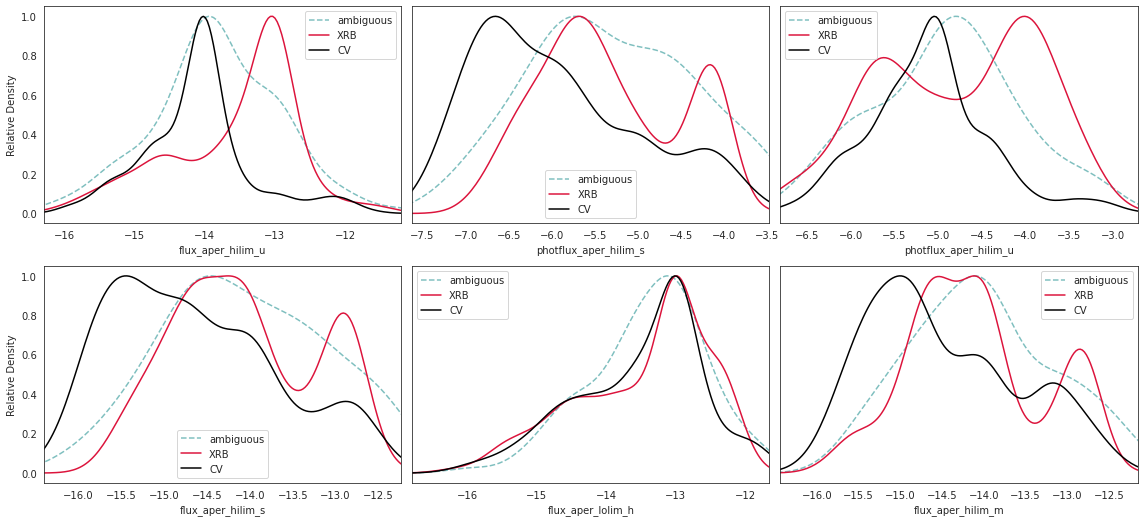

In [50]:
fig, axs = plt.subplots(2,3, sharey=True, sharex=False , figsize=(16 , 8))
col = sns.diverging_palette(240, 10, n=6 , center='dark')
f_name  =  df_feat_clb['feat_name'][:6]
axs = np.ndarray.flatten(axs)
sns.set_style('white')
i = 0 
for f , axi in zip(f_name , axs):
    if(f=='bb_stat'):
        filtered_res = res_data[~is_outlier(res_data[f] , thresh=650)]
    else:
        filtered_res = res_data[~is_outlier(res_data[f] , thresh=350)]
    #filtered_res = res_data.copy()
    #print(f)
    ax = sns.displot(data = res_data , x = f ,hue = 'true_class' , kind='kde' ,)
    plt.close()
    ax2 = sns.displot(data = res_data[res_data['th_class']=='X'] , x = f ,hue = 'th_class' , kind='kde' ,)
    plt.close()
    amb  , amb_x= ax2.ax.lines[0].get_ydata() , ax2.ax.lines[0].get_xdata()
    amb =  amb / np.amax(amb)
    bh  ,  bh_x = ax.ax.lines[0].get_ydata() , ax.ax.lines[0].get_xdata() 
    bh = bh /np.amax(bh) 
    ns , ns_x = ax.ax.lines[1].get_ydata() , ax.ax.lines[1].get_xdata()
    ns = ns/np.amax(ns)
    #x_val = ax.ax.lines[0].get_xdata() , ax.ax.lines[1].get_xdata()
    #plt.close()
    axi.plot(amb_x , amb , label = 'ambiguous' , color='teal' , alpha=0.5 , linestyle='--')
    axi.plot(ns_x , ns , label = 'XRB' , color='crimson')
    axi.plot(bh_x , bh , label = 'CV' , color = 'black')
    axi.legend()
    axi.set_xlim(np.amin(filtered_res[f]) , np.amax(filtered_res[f]))
    axi.grid(True , color='k' , linestyle=':' , alpha=0.4)
    axi.grid(False)
    axi.set_xlabel(f)
    #axi.set_xscale('log')
    if(not(i%3)):
        axi.set_ylabel('Relative Density')
    i+=1    
    #axi.text(0.1 , 0.1 ,  'Feature : '+f)
#fig.suptitle('Feature Distribution')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
plt.close()
